In [1]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords 

In [19]:
data = pd.read_csv('../../Dataset/Label Otomatis/Label 5-20.csv', sep=',', encoding='utf-8')
data.head()

,Tanggal,Banyak Retweet,Tweet,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments
0,05/05/2021 00:00,0.0,halah kaget alat test manipulasi bansos korups...,i'm surprised that the social assistance manip...,0.655556,-0.122222,negatif,1
1,05/05/2021 00:00,1977.0,terang saksi dakwa jabat kemensos ajak tim tek...,explained that the witness charged with holdin...,0.077778,0.022222,positif,2
2,05/05/2021 00:01,442.0,2 tangan sidik nama edar media singkir kpk,2 hands print media circulation name get rid o...,0.000000,0.000000,netral,0
3,05/05/2021 00:01,467.0,hadap kpk mega korupsi bansos ekspor benih lob...,"confronting kpk mega corruption, social assist...",0.066667,0.033333,positif,2
4,05/05/2021 00:01,1730.0,usaha sedia paket bansos fiktif emang laku kor...,efforts to provide fictitious social assistanc...,0.066667,0.033333,positif,2


In [23]:
data_clean = pd.read_csv('../../Dataset/Label Otomatis/Label 5-20.csv', sep=',', encoding='latin1')
data_clean = data_clean.astype({'Sentiments' : 'category'})
data_clean = data_clean.astype({'Tweet' : 'string'})
data_clean.dtypes

Tanggal             object
Banyak Retweet     float64
Tweet               string
Terjemah            object
Subjectivity       float64
Polarity           float64
Sentiment           object
Sentiments        category
dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

tf = TfidfVectorizer()
tvec = CountVectorizer()
X_cVec = tf.fit_transform(data_clean['Tweet'].astype('U'))
print(X_cVec)
h_tfidf= TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)
X = data_clean.Tweet
Y = data_clean.Sentiments

  (0, 4758)	0.24629253125578188
  (0, 9333)	0.2304355961971089
  (0, 4353)	0.32354945950782027
  (0, 6240)	0.1245152081173079
  (0, 1248)	0.06120096360281627
  (0, 7122)	0.4330167403299258
  (0, 11842)	0.3327430169554457
  (0, 620)	0.33184133410599764
  (0, 5393)	0.4184680453991901
  (0, 4292)	0.42290659551094373
  (1, 4243)	0.34183384639585546
  (1, 10734)	0.3540773640265431
  (1, 5519)	0.26136077531531093
  (1, 1105)	0.22802423060264007
  (1, 11690)	0.3475168350712191
  (1, 11931)	0.2987809251908642
  (1, 536)	0.3323370363186558
  (1, 5757)	0.19367506803617124
  (1, 4991)	0.21150814028552029
  (1, 2657)	0.27902045193393904
  (1, 10368)	0.2638406531813757
  (1, 11768)	0.29167123770349157
  (1, 1248)	0.0469712714758068
  (2, 6311)	0.2239894368040709
  (2, 10994)	0.374343016661273
  :	:
  (9054, 1248)	0.07187417727339068
  (9055, 9414)	0.2547584865416472
  (9055, 6895)	0.2547584865416472
  (9055, 2569)	0.24379088570107393
  (9055, 25)	0.22997334276441347
  (9055, 111)	0.2360092490656515

In [25]:
# Nama fitur
nama_fitur = tf.get_feature_names()

# Dimensi data
dimensions = x_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 9057
Jumlah fitur   = 12976


In [26]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row 
    row = x_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes 
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {'nomor artikel': n+1, 'nilai TFIDF': highestTFIDFvalue,
                'top word': highestTFIDFword}
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar 
words_data = pd.DataFrame({
    'Kata': words,
    'Banyak': n
}).sort_values(by='Banyak', ascending=False).head(20)
words_data 

,Kata,Banyak
2743,kawan,22
2627,kabar,16
1646,duta,16
6386,world,14
6207,urus,13
5322,semayam,13
3810,miskin,12
1169,cilik,11
5078,royong,10
998,bu,10


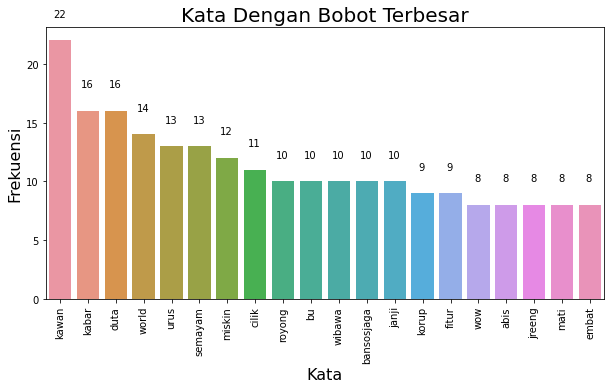

In [27]:
# Plotting Barplot
plt.figure(figsize = (10,5))
sns.barplot(x = words_data['Kata'],y = words_data['Banyak'])
for i, v in enumerate(words_data['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 2, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
#splitting data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10)
X_array = x_tfidf.toarray()
def cross_val(estimator):
    acc = []
    pcs = []
    rec = []
    
    for train_index,test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        model = estimator.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        rec.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        rec.append(f1_score(y_test, y_pred, average='macro',zero_division=0))
        
        print(classification_report(y_test, y_pred, zero_division=0))
        print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred)}')
        print('====================================================\n')
        
    print(f'average Accuracy : {np.mean(acc)}')
    print(f'average Precision : {np.mean(pcs)}')
    print(f'average Recall : {np.mean(rec)}')
    print(f'average f1-score : {np.mean(rec)}')
    
cross_val(rf)

              precision    recall  f1-score   support

           0       0.54      0.53      0.53        85
           1       0.86      0.41      0.56       246
           2       0.76      0.93      0.84       575

    accuracy                           0.75       906
   macro avg       0.72      0.62      0.64       906
weighted avg       0.77      0.75      0.73       906

confusion matrix:
 [[ 45   1  39]
 [ 15 101 130]
 [ 24  15 536]]

              precision    recall  f1-score   support

           0       0.51      0.25      0.34        83
           1       0.83      0.41      0.55       239
           2       0.74      0.94      0.83       584

    accuracy                           0.74       906
   macro avg       0.69      0.54      0.57       906
weighted avg       0.74      0.74      0.71       906

confusion matrix:
 [[ 21   3  59]
 [  3  99 137]
 [ 17  17 550]]

              precision    recall  f1-score   support

           0       0.49      0.34      0.40        

In [30]:
data['prediction'] = rf.predict(x_tfidf)
data.head()

,Tanggal,Banyak Retweet,Tweet,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments,prediction
0,05/05/2021 00:00,0.0,halah kaget alat test manipulasi bansos korups...,i'm surprised that the social assistance manip...,0.655556,-0.122222,negatif,1,1
1,05/05/2021 00:00,1977.0,terang saksi dakwa jabat kemensos ajak tim tek...,explained that the witness charged with holdin...,0.077778,0.022222,positif,2,2
2,05/05/2021 00:01,442.0,2 tangan sidik nama edar media singkir kpk,2 hands print media circulation name get rid o...,0.000000,0.000000,netral,0,0
3,05/05/2021 00:01,467.0,hadap kpk mega korupsi bansos ekspor benih lob...,"confronting kpk mega corruption, social assist...",0.066667,0.033333,positif,2,2
4,05/05/2021 00:01,1730.0,usaha sedia paket bansos fiktif emang laku kor...,efforts to provide fictitious social assistanc...,0.066667,0.033333,positif,2,2


In [32]:
data.to_csv('../../Dataset/Label Otomatis/Label 5-20 Predict.csv',encoding='utf8', index=False)
data.head()

,Tanggal,Banyak Retweet,Tweet,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments,prediction
0,05/05/2021 00:00,0.0,halah kaget alat test manipulasi bansos korups...,i'm surprised that the social assistance manip...,0.655556,-0.122222,negatif,1,1
1,05/05/2021 00:00,1977.0,terang saksi dakwa jabat kemensos ajak tim tek...,explained that the witness charged with holdin...,0.077778,0.022222,positif,2,2
2,05/05/2021 00:01,442.0,2 tangan sidik nama edar media singkir kpk,2 hands print media circulation name get rid o...,0.000000,0.000000,netral,0,0
3,05/05/2021 00:01,467.0,hadap kpk mega korupsi bansos ekspor benih lob...,"confronting kpk mega corruption, social assist...",0.066667,0.033333,positif,2,2
4,05/05/2021 00:01,1730.0,usaha sedia paket bansos fiktif emang laku kor...,efforts to provide fictitious social assistanc...,0.066667,0.033333,positif,2,2


In [36]:
data1 = pd.read_csv('../../Dataset/Label Otomatis/Label 5-20 Predict.csv', sep=',', encoding='utf-8')
data1.head()

,Tanggal,Banyak Retweet,Tweet,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments,prediction
0,05/05/2021 00:00,0.0,halah kaget alat test manipulasi bansos korups...,i'm surprised that the social assistance manip...,0.655556,-0.122222,negatif,1,1
1,05/05/2021 00:00,1977.0,terang saksi dakwa jabat kemensos ajak tim tek...,explained that the witness charged with holdin...,0.077778,0.022222,positif,2,2
2,05/05/2021 00:01,442.0,2 tangan sidik nama edar media singkir kpk,2 hands print media circulation name get rid o...,0.000000,0.000000,netral,0,0
3,05/05/2021 00:01,467.0,hadap kpk mega korupsi bansos ekspor benih lob...,"confronting kpk mega corruption, social assist...",0.066667,0.033333,positif,2,2
4,05/05/2021 00:01,1730.0,usaha sedia paket bansos fiktif emang laku kor...,efforts to provide fictitious social assistanc...,0.066667,0.033333,positif,2,2


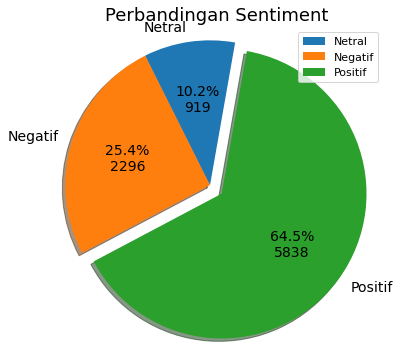

In [37]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = data1['Tweet'].groupby(data1['prediction']).count().values

plt.figure(figsize = (6,6))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Netral','Negatif','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=80, textprops={'fontsize': 14})
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [15]:
# Create Stopword
with open("../Kamus/Stopword - WC.txt", "r") as f:
    stop_words = f.readline().split()

In [16]:
index_p = data1['prediction'][data1['Sentiment'] == 1].index
index_n = data1['prediction'][data1['Sentiment'] == 0].index

In [19]:
# Select Positif & Negatif
positif = x_tfidf[index_p]
negatif = x_tfidf[index_n]

In [20]:
# Mencari Kata positif & Kata positif Dengan Bobot tertinggi
def finder(words):
    kata, top_kata = {}, {}
    for i in range(words.shape[0]):
        row = words.getrow(i).toarray()[0]
        max_ = max(row)
        for j in range(len(row)):
            if row[j] > 0:
                if nama_fitur[j] not in kata :
                    kata[nama_fitur[j]] = 1
                else :
                    kata[nama_fitur[j]] += 1
                if row[j] == max_:
                    if nama_fitur[j] in top_kata:
                        top_kata[nama_fitur[j]] += 1
                    else :
                        top_kata[nama_fitur[j]] = 1
    return kata, top_kata

In [21]:
positif, top_positif = finder(positif)
negatif, top_negatif = finder(negatif)

In [22]:
# Sorting
top_positif = {k: v for k, v in sorted(top_positif.items(), key=lambda item: item[1],reverse=True)}
top_negatif = {k: v for k, v in sorted(top_negatif.items(), key=lambda item: item[1],reverse=True)}

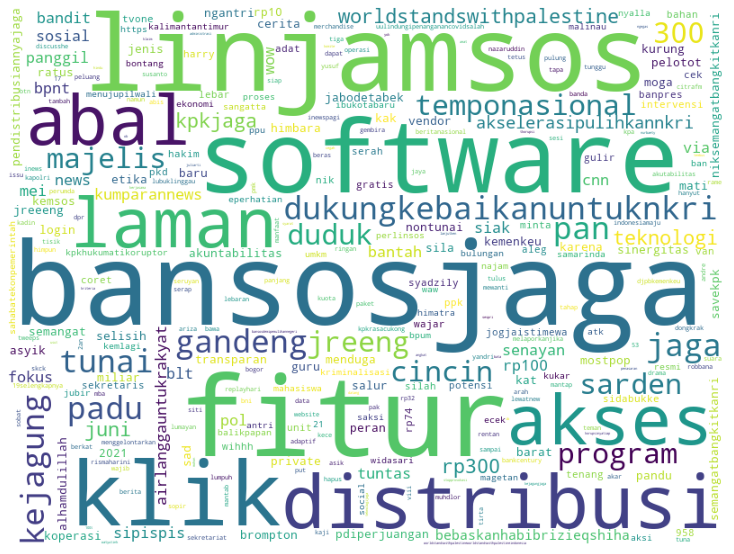

In [26]:
# WordCloud kata dengan bobot terbesar Positif
w = WordCloud(width=800,height=600,mode='RGBA', stopwords=stop_words, background_color='white',max_words=5000).fit_words(top_positif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

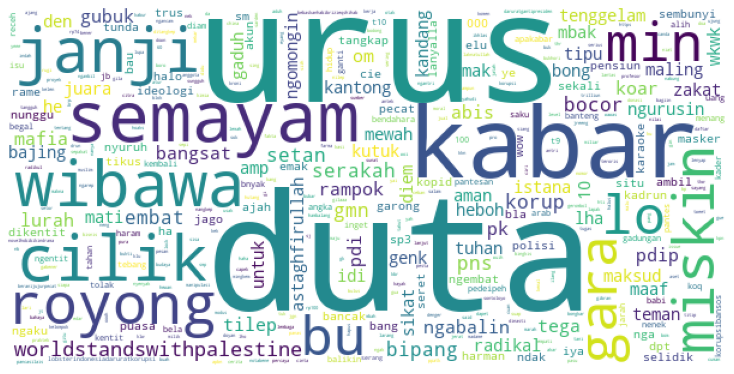

In [24]:
# WordCloud kata dengan bobot terbesar Negatif
w = WordCloud(width=600,height=300,mode='RGBA', stopwords=stop_words, background_color='white', max_words=5000).fit_words(top_negatif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()